# Credit Risk Modeling

### Predicting loan default

In [2]:
# @ author: Gautam Venkatraman
# @ date: 6 Dec 2016
# @ modification log
#-------------------------------------------------------------------------------------------
#Date                Descirption
#-------------------------------------------------------------------------------------------


In [1]:
# data as data frame
import pandas as pd

In [16]:
Dir = 'C:/Users/gvenk/Desktop/BDAP/Case studies/Loan default/'

In [131]:
train = pd.read_csv(('%strain_loanDefault.csv' % Dir))

In [132]:
test = pd.read_csv(('%stest_loanDefault.csv' % Dir))

In [19]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Data Analysis

In [20]:
train.describe()

C:\Users\gvenk\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,NaN,NaN,NaN
50%,3812.500000,1188.500000,NaN,NaN,NaN
75%,5795.000000,2297.250000,NaN,NaN,NaN
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [53]:
train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001888,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,NaN,NaN,NaN,NaN,NaN


In [21]:
train.columns

Index([u'Loan_ID', u'Gender', u'Married', u'Dependents', u'Education',
       u'Self_Employed', u'ApplicantIncome', u'CoapplicantIncome',
       u'LoanAmount', u'Loan_Amount_Term', u'Credit_History', u'Property_Area',
       u'Loan_Status'],
      dtype='object')

In [33]:
train.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [34]:
train.Married.value_counts(dropna=False)

Yes    398
No     213
NaN      3
Name: Married, dtype: int64

In [35]:
train.Dependents.value_counts(dropna=False)

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64

In [36]:
train.Education.value_counts(dropna=False)

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [38]:
train.Loan_Amount_Term.value_counts(dropna=False)

 360.0    512
 180.0     44
 480.0     15
NaN        14
 300.0     13
 240.0      4
 84.0       4
 120.0      3
 60.0       2
 36.0       2
 12.0       1
Name: Loan_Amount_Term, dtype: int64

In [39]:
train.Credit_History.value_counts(dropna=False)

 1.0    475
 0.0     89
NaN      50
Name: Credit_History, dtype: int64

In [40]:
train.Property_Area.value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Studying data distribution

In [54]:
%matplotlib inline

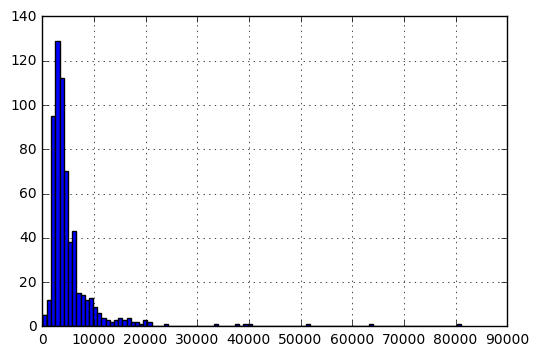

In [66]:
import matplotlib.pyplot as plt
train.ApplicantIncome.hist(bins=100)

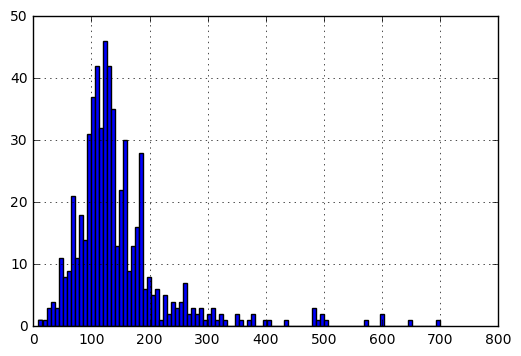

In [121]:
import matplotlib.pyplot as plt
train.LoanAmount.hist(bins=100)

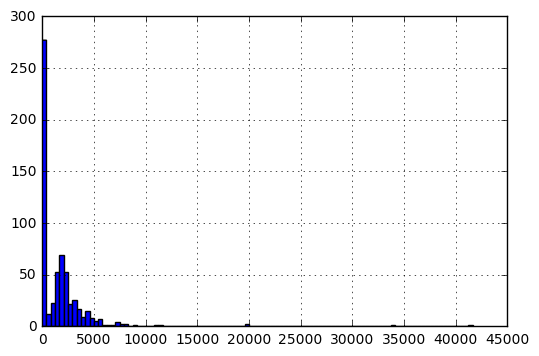

In [67]:
train.CoapplicantIncome.hist(bins=100)

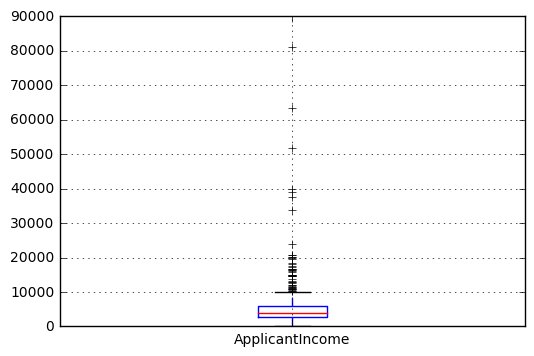

In [71]:
train.boxplot(column='ApplicantIncome', return_type='axes')

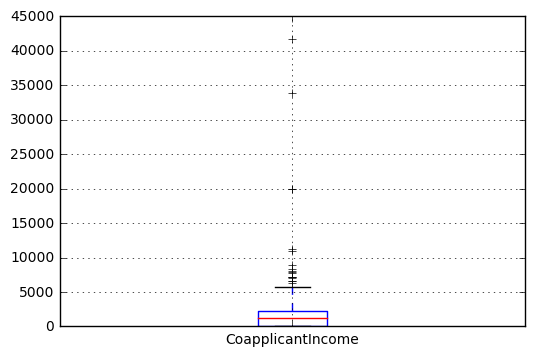

In [73]:
train.boxplot(column='CoapplicantIncome', return_type='axes')

OrderedDict([('ApplicantIncome',
              <matplotlib.axes._subplots.AxesSubplot at 0xf4adb00>)])

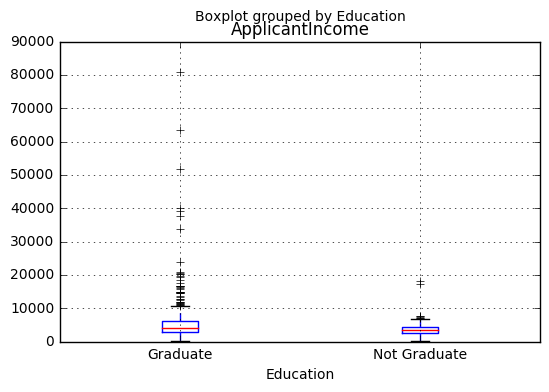

In [74]:
train.boxplot(column='ApplicantIncome', return_type='axes', by='Education')

OrderedDict([('CoapplicantIncome',
              <matplotlib.axes._subplots.AxesSubplot at 0x10aaac50>)])

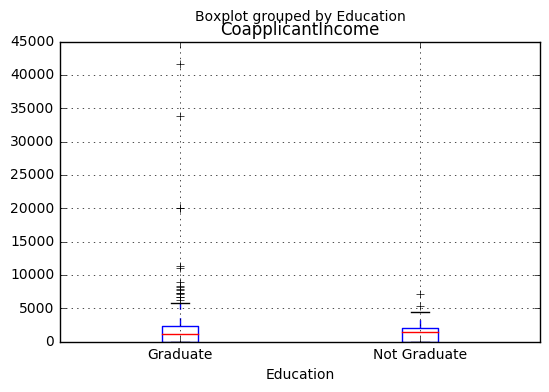

In [75]:
train.boxplot(column='CoapplicantIncome', return_type='axes', by='Education')

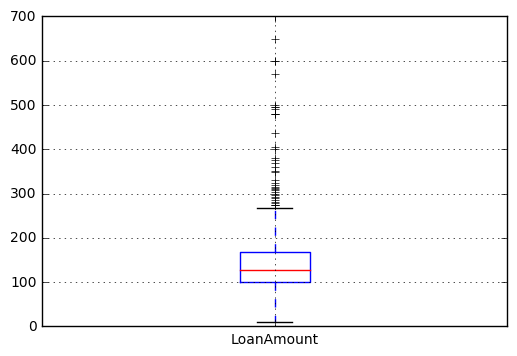

In [76]:
train.boxplot(column='LoanAmount', return_type='axes')

OrderedDict([('LoanAmount',
              <matplotlib.axes._subplots.AxesSubplot at 0x10a60cf8>)])

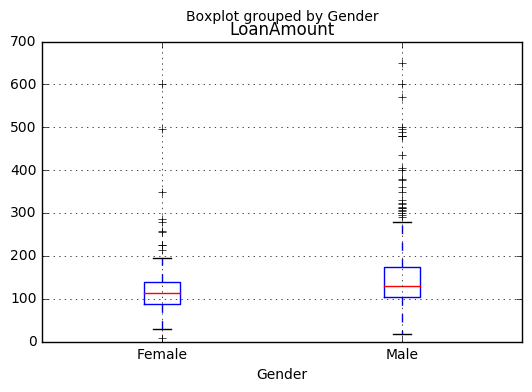

In [77]:
train.boxplot(column='LoanAmount', return_type='axes', by='Gender')

OrderedDict([('LoanAmount',
              <matplotlib.axes._subplots.AxesSubplot at 0x117fe588>)])

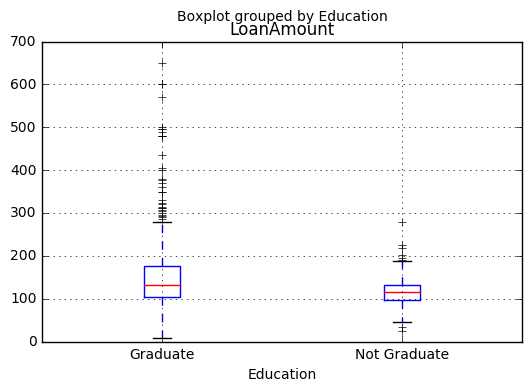

In [81]:
train.boxplot(column='LoanAmount', return_type='axes', by='Education')

## Categorical variable analysis

In [95]:
temp1 = train['Credit_History'].value_counts(ascending=True)
temp2 = train.pivot_table(values='Loan Status', index=['Credit_History'], aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())

In [96]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [100]:
temp2

""


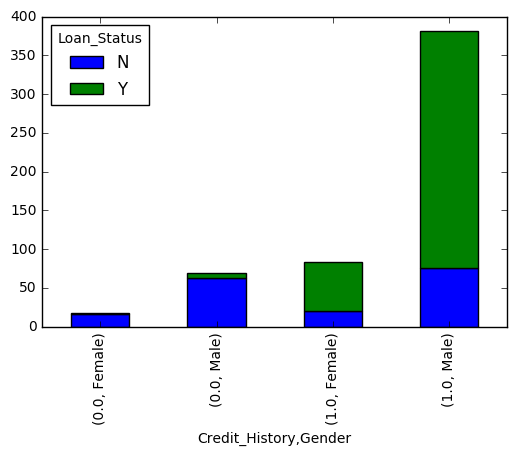

In [114]:
temp4 = pd.crosstab([train['Credit_History'], train['Gender']], train['Loan_Status'])
temp4.plot(kind='bar', stacked=True)

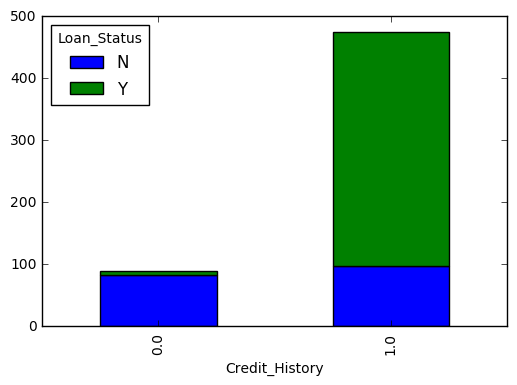

In [115]:
# Credit history has significant impact on loan status
temp3 = pd.crosstab(train['Credit_History'], train['Loan_Status'])
temp3.plot(kind='bar', stacked=True)

# Data Cleansing

In [133]:
train.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [134]:
# Imputing missing loan amount values

train.LoanAmount.fillna(train.LoanAmount.mean(), inplace=True)

In [135]:
sum(train.LoanAmount.isnull())

0

In [136]:
# Imputing self employed
train.Self_Employed.value_counts(dropna=False)

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64

In [137]:
train.Self_Employed.fillna('No', inplace=True)
train.Self_Employed.value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [140]:
import numpy as np
table = train.pivot_table(values = "LoanAmount",index='Self_Employed',columns='Education', aggfunc= np.median)

In [141]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [142]:
# Function to return values of pivot table

def fage(X):
    return table.loc(X['Self_Employed'], X['Education'])

In [143]:
# Replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(fage,axis=1), inplace=True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

## How to handle extreme values in the data?

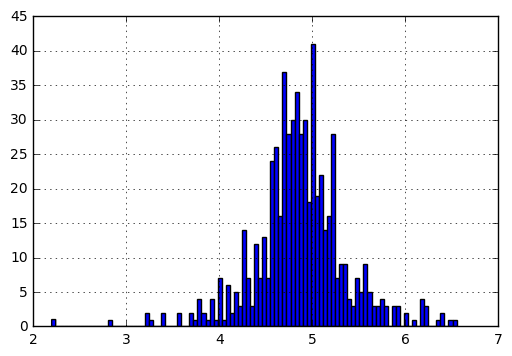

In [146]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=100)

In [155]:
np.corrcoef(train.ApplicantIncome, train.CoapplicantIncome)[0,1]

-0.11660458122889966

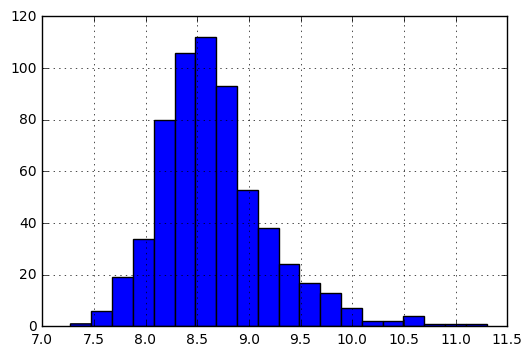

In [156]:
train["TotalIncome"] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log']=np.log(train['TotalIncome'])
train['TotalIncome_log'].hist(bins=20)
